###### 탈퇴한 고객을 drop해서 join시 고객 정보가 없는 거래 건수가 233994건으로 나옴.
###### 따라서 우리의 분석 목적에 맞게 탈퇴 고객을 포함하여 다시 조인 진행할 예정.
###### 혹시 몰라 새로운 파일을 만들어서 다시 진행.

In [1]:
import pandas as pd
#경로는 꼭 새롭게 설정 후 데이터가 가져와졌는지 확인 먼저 필요함
articles = pd.read_csv("../../data/articles_hm.csv")
customers = pd.read_csv("../../data/customer_hm.csv")
transactions = pd.read_csv("../../data/transactions_hm.csv")

In [2]:
#2. 원본 데이터 지키기 위해서 copy
df_cust = customers.copy()
df_tran = transactions.copy()
df_art = articles.copy()

In [3]:
transactions["sales_channel_id"].value_counts(dropna=False)

sales_channel_id
2    729192
1    319383
Name: count, dtype: int64

In [4]:
#3.join을 위해 동일한 타입으로 변환
df_tran['customer_id']= df_tran['customer_id'].astype(str).str.zfill(10)
df_cust['customer_id']= df_cust['customer_id'].astype(str).str.zfill(10)

df_tran['article_id']= df_tran['article_id'].astype(str).str.zfill(10)
df_art['article_id'] = df_art['article_id'].astype(str).str.zfill(10)

In [5]:
#4. 데이터 크기 및 중복 확인

print("df_tran (복사본) 크기:", df_tran.shape)
print("중복 데이터 수:", df_tran.duplicated().sum())

df_tran (복사본) 크기: (1048575, 5)
중복 데이터 수: 8474


In [6]:
#5.중복된 거래 로그를 제거하여 분석 결과의 왜곡을 방지
df_tran.drop_duplicates(inplace=True)

In [7]:
print('중복 데이터 수:', df_tran.duplicated().sum())

중복 데이터 수: 0


In [8]:
#6. 날짜 타입 변환
df_tran['t_dat'] = pd.to_datetime(df_tran['t_dat'], format='%Y-%m-%d')

In [9]:
# 타입 변환 확인
df_tran.info()

<class 'pandas.DataFrame'>
Index: 1040101 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   t_dat             1040101 non-null  datetime64[us]
 1   customer_id       1040101 non-null  str           
 2   article_id        1040101 non-null  str           
 3   price             1040101 non-null  float64       
 4   sales_channel_id  1040101 non-null  int64         
dtypes: datetime64[us](1), float64(1), int64(1), str(2)
memory usage: 47.6 MB


In [10]:
#7. 판매 채널 컬럼 생성 및 값 변환
df_tran["channel"] = df_tran["sales_channel_id"].map({1: "오프라인", 2: "온라인"})
df_tran["channel"].value_counts() 
numbs = df_tran["channel"].value_counts()
print("온라인:", f"{numbs['온라인']:,}")
print("오프라인:", f"{numbs['오프라인']:,}")
print("전체 거래 건수:", f"{df_tran.shape[0]:,}")

온라인: 721,488
오프라인: 318,613
전체 거래 건수: 1,040,101


In [11]:
df_tran.head()

,t_dat,customer_id,article_id,price,sales_channel_id,channel
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,0698328010,0.016932,2,온라인
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,0760597002,0.033881,2,온라인
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,0488561032,0.016932,2,온라인
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,0682771001,0.033881,2,온라인
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,0742400033,0.003220,1,오프라인


In [12]:
#8. 가격 데이터 분포 확인
df_tran['price'].describe() 
print("price가 0.1 이상:", len(df_tran[df_tran["price"] >= 0.1]))
print("price가 0.2 이상:", len(df_tran[df_tran["price"] >= 0.2]))
print("price가 0.3 이상:", len(df_tran[df_tran["price"] >= 0.3]))
print("price가 0.4 이상:", len(df_tran[df_tran["price"] >= 0.4]))
print("price가 0.5 이상:", len(df_tran[df_tran["price"] >= 0.5]))

price가 0.1 이상: 10704
price가 0.2 이상: 719
price가 0.3 이상: 126
price가 0.4 이상: 29
price가 0.5 이상: 2


In [13]:
#9. 고가 거래 분리 및 채널 확인
high_price_transactions = df_tran[df_tran["price"] >= 0.4]
high_price_transactions['sales_channel_id'].replace({1: 'Offline', 2: 'Online'}).value_counts() 


sales_channel_id
Online    29
Name: count, dtype: int64

In [14]:
#10.월 컬럼 생성
df_tran['year_month'] = df_tran['t_dat'].dt.to_period('M') 

In [15]:
df_tran.head()

,t_dat,customer_id,article_id,price,sales_channel_id,channel,year_month
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,0698328010,0.016932,2,온라인,2019-11
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,0760597002,0.033881,2,온라인,2019-05
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,0488561032,0.016932,2,온라인,2019-05
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,0682771001,0.033881,2,온라인,2019-08
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,0742400033,0.003220,1,오프라인,2019-08


In [ ]:
#11.월별 거래 건수 & 매출액 계산
monthly_sales = df_tran.groupby('year_month').size()
monthly_price = df_tran.groupby('year_month')['price'].sum()
print(monthly_price)

year_month
2019-01    2129.926131
2019-02    1989.217641
2019-03    2374.905504
2019-04    2703.443538
2019-05    2748.199469
2019-06    3088.776976
2019-07    2552.035334
2019-08    1943.422489
2019-09    2559.226862
2019-10    2358.486793
2019-11    2463.769270
2019-12    1985.492149
Freq: M, Name: price, dtype: float64


In [17]:
#12. 최고 매출 월 
best_month = monthly_price.idxmax()
best_value = monthly_price.max()
print("가장 매출이 높은 달:", best_month)
print("그 달의 매출:", best_value) 

가장 매출이 높은 달: 2019-06
그 달의 매출: 3088.776976142


In [18]:
df_tran["price"].min()

np.float64(0.000237288)

In [19]:
df_tran.shape

(1040101, 7)

In [20]:
df_art['detail_desc'] = df_art['detail_desc'].fillna('No Description')

In [21]:
cols_to_drop = [
    'product_type_no', 
    'graphical_appearance_no', 
    'colour_group_code', 
    'perceived_colour_value_id',
    'perceived_colour_master_id',
    'department_no',
    'index_code',
    'index_group_no',
    'section_no',
    'garment_group_no'
]
articles_cleaned = df_art.drop(columns=cols_to_drop)

In [22]:
def get_season(section):
    section = section.lower()
    # FW
    if any(kw in section for kw in ['outerwear', 'nightwear', 'socks', 'tights', 'knitted']):
        return 'FW'
    # SS
    elif any(kw in section for kw in ['swimwear', 'sport', 'shorts', 'sandals']):
        return 'SS'
    # 두루두루 아이템(all season)
    else:
        return 'All-Season'

In [23]:
df_art.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,0108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,0108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,0110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,0110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [24]:
df_art['product_season'] = df_art['section_name'].apply(get_season)
df_art['category_main'] = df_art['index_group_name']

In [25]:
df_art.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,product_season,category_main
0,0108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,All-Season,Ladieswear
1,0108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,All-Season,Ladieswear
2,0108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,All-Season,Ladieswear
3,0110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",All-Season,Ladieswear
4,0110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde...",All-Season,Ladieswear


In [26]:
def get_season(row):
    text = (str(row['section_name']) + " " + str(row['prod_name'])).lower()
    group = str(row['product_group_name']).lower()
    
    fw_keywords = ['outerwear', 'nightwear', 'socks', 'tights', 'knitted', 
                'jacket', 'coat', 'hoodie', 'sweatshirt', 'scarf', 'gloves', 
                'boots', 'heavy', 'fur', 'wool', 'cardigan', 'winter']
    
    ss_keywords = ['swimwear', 'sport', 'shorts', 'sandals', 'sleeveless', 
                'tank', 'mini', 'beach', 'summer', 'sun', 'flip flop', 
                'skirt', 'dress']
    
    if any(kw in text for kw in fw_keywords) or group in ['items of clothing']:
        return 'FW'
    elif any(kw in text for kw in ss_keywords) or group in ['swimwear']:
        return 'SS'
    else:
        return 'All-Season'
    

In [27]:
df_art['product_season'] = df_art.apply(get_season, axis=1)

In [28]:
# 3. 신상품/트렌드 여부 파생변수
def check_newness(row):
    text = (str(row['prod_name']) + " " + str(row['detail_desc'])).lower()
    new_keywords = ['new', 'collection', 'latest', 'trend', 'exclusive']
    
    if any(kw in text for kw in new_keywords):
        return 'New_Arrival'
    return 'Regular_Carryover'

In [29]:
df_art['is_new'] = df_art.apply(check_newness, axis=1)

In [30]:
# 4. 색상 톤 그룹화 
def get_color_tone(color):
    color = str(color).lower()
    dark_colors = ['black', 'dark blue', 'dark grey', 'dark red', 'navy blue', 'dark green', 'anthracite']
    light_colors = ['white', 'light beige', 'off white', 'light pink', 'light blue', 'yellowish brown']
    
    if any(dc in color for dc in dark_colors):
        return 'Dark_Tone'
    elif any(lc in color for lc in light_colors):
        return 'Light_Tone'
    else:
        return 'Neutral_Tone'

In [31]:
df_art['color_tone'] = df_art['colour_group_name'].apply(get_color_tone)

In [32]:
df_cust.isnull().sum()

customer_id               0
FN                        0
Active                    0
club_member_status        0
fashion_news_frequency    1
age                       0
dtype: int64

In [33]:
missing_data = df_cust[df_cust['fashion_news_frequency'].isnull()]
missing_data

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
876108,a79d9cbfaceb0d25a91caccfad167d4d6391fd5bb4292b...,1,0,ACTIVE,NaN,38


In [34]:
# FN이 1이고, Active가 0인 fashion_news_frequency의 고유값별 빈도 확인
df_cust[(df_cust['FN'] == 1) & (df_cust['Active'] == 0)
]['fashion_news_frequency'].value_counts(dropna=False)

fashion_news_frequency
Regularly    9598
NONE          238
Monthly        27
NaN             1
Name: count, dtype: int64

In [35]:
# 결측치 'Regularly'으로 채우기
df_cust['fashion_news_frequency'] = df_cust['fashion_news_frequency'].fillna('Regularly')

In [36]:
#  (문자형 정수형으로 매핑) 사전 정의
status_map = {'ACTIVE': 2, 'PRE-CREATE': 1, 'LEFT CLUB': 0}
frequency_map = {'Regularly': 2, 'Monthly': 1, 'NONE': 0}

In [37]:
#  매핑 적용
df_cust['club_member_status'] = df_cust['club_member_status'].map(status_map)
df_cust['fashion_news_frequency'] = df_cust['fashion_news_frequency'].map(frequency_map)

In [38]:
# 나이를 나이대별로 나눠 파생변수 생성
def cate_age(age):
    if age < 20: return '10대'
    elif age < 30: return '20대'
    elif age < 40: return '30대'
    elif age < 50: return '40대'
    elif age < 60: return'50대'
    else: return '60대 이상'

df_cust['age_segment'] = df_cust['age'].apply(cate_age)

In [39]:
#12. 고객 정보와 거래 로그를 customer_id 기준으로 조인
df_merged = pd.merge(df_tran, df_cust, on='customer_id', how='left')

In [40]:
print(f"조인 후 데이터 크기: {df_merged.shape}")
print(f"고객 정보가 없는 거래 건수: {df_merged['age_segment'].isnull().sum()}")

조인 후 데이터 크기: (1040101, 13)
고객 정보가 없는 거래 건수: 233734


In [76]:
# age_segment가 Null인 데이터들만 모아서 다른 정보도 Null인지 확인
missing_info_check = df_merged[df_merged['age_segment'].isnull()]

# 다른 고객 정보 컬럼들도 같이 Null인지 샘플 확인 (5개만)
print("### 고객 정보가 없는 행들의 다른 컬럼 상태 ###")
print(missing_info_check[['customer_id', 'club_member_status', 'FN','Active','fashion_news_frequency','age']].isnull().sum())

### 고객 정보가 없는 행들의 다른 컬럼 상태 ###
customer_id                    0
club_member_status        233734
FN                        233734
Active                    233734
fashion_news_frequency    233734
age                       233734
dtype: int64


In [ ]:

check_nulls = df_merged[df_merged['age'].isnull()]

print(f"나이가 비어있는 전체 건수: {len(check_nulls)}건")
print(f"그 중 고객 아이디(ID)까지 비어있는 건수: {check_nulls['customer_id'].isnull().sum()}건")

나이가 비어있는 전체 건수: 233734건
그 중 고객 아이디(ID)까지 비어있는 건수: 0건


In [77]:
print(df_merged.columns.tolist())

['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id', 'channel', 'year_month', 'FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'age', 'age_segment']


In [ ]:

no_id_data = df_merged[df_merged['customer_id'].isnull()]

print(f"아이디 없는 데이터의 수: {len(no_id_data)}건")
print(f"이 중 구매 금액이 있는 건수: {no_id_data['price'].notnull().sum()}건")

# 3. 만약 구매 금액조차 없다면? -> 완전히 버려야 할 결측치
# 4. 만약 구매 금액은 있다면? -> "누군지 모르지만 매출은 발생시킨 유령 고객"

아이디 없는 데이터의 수: 0건
이 중 구매 금액이 있는 건수: 0건


In [79]:
# Unknown 그룹 중에서 나이(age) 값이 Null이 아닌 것들만 추출
mysterious_data = june_final_analysis[(june_final_analysis['age_segment'] == 'Unknown') & (june_final_analysis['age'].notnull())]

print(f"나이가 있는데 Unknown으로 분류된 건수: {len(mysterious_data)}건")
if not mysterious_data.empty:
    print("\n[해당 데이터의 실제 나이 샘플]")
    print(mysterious_data['age'].unique()) # 어떤 나이들이 들어있는지 확인

나이가 있는데 Unknown으로 분류된 건수: 0건


In [80]:
# 아이디가 없는 22%의 데이터만 추출
guest_data = df_merged[df_merged['customer_id'].isnull()]

print(f"아이디 없는 데이터 비중: {len(guest_data) / len(df_merged) * 100:.1f}%")
print(f"이들의 실제 매출 발생 건수 (price > 0): {guest_data[guest_data['price'] > 0].shape[0]}건")
print(f"이들의 평균 구매 금액: {guest_data['price'].mean():.4f}")

아이디 없는 데이터 비중: 0.0%
이들의 실제 매출 발생 건수 (price > 0): 0건
이들의 평균 구매 금액: nan


In [ ]:

print("### 1. 현재 컬럼 목록 확인 ###")
print(df_merged.columns.tolist())
print("\n### 2. 나이 정보 요약 ###")
print(df_merged['age'].describe())
re_check = df_merged[(df_merged['age_segment'] == 'Unknown') | (df_merged['age'].isnull())]

print("\n### 3. Unknown 데이터 재검증 ###")
print(f"Unknown으로 의심되는 데이터 건수: {len(re_check)}건")
print(f"이들의 총 매출액 합계: {re_check['price'].sum()}")

### 1. 현재 컬럼 목록 확인 ###
['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id', 'channel', 'year_month', 'FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'age', 'age_segment']

### 2. 나이 정보 요약 ###
count    806367.000000
mean         36.364447
std          13.009324
min          16.000000
25%          26.000000
50%          32.000000
75%          48.000000
max          99.000000
Name: age, dtype: float64

### 3. Unknown 데이터 재검증 ###
Unknown으로 의심되는 데이터 건수: 233734건
이들의 총 매출액 합계: 6498.637870835


In [ ]:

print("### [확인 1] 컬럼명 및 데이터 타입 ###")
print(df_merged.info())
print("\n### [확인 2] Unknown 데이터 샘플 ###")
unknown_sample = df_merged[df_merged['age_segment'] == 'Unknown'].head(5)
print(unknown_sample)
print("\n### [확인 3] 매출액 재계산 (타입 변환 포함) ###")
df_merged['price'] = pd.to_numeric(df_merged['price'], errors='coerce').fillna(0)
print(f"Unknown 총 매출액: {df_merged[df_merged['age_segment'] == 'Unknown']['price'].sum()}")

### [확인 1] 컬럼명 및 데이터 타입 ###
<class 'pandas.DataFrame'>
RangeIndex: 1040101 entries, 0 to 1040100
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   t_dat                   1040101 non-null  datetime64[us]
 1   customer_id             1040101 non-null  str           
 2   article_id              1040101 non-null  str           
 3   price                   1040101 non-null  float64       
 4   sales_channel_id        1040101 non-null  int64         
 5   channel                 1040101 non-null  str           
 6   year_month              1040101 non-null  period[M]     
 7   FN                      806367 non-null   float64       
 8   Active                  806367 non-null   float64       
 9   club_member_status      806367 non-null   float64       
 10  fashion_news_frequency  806367 non-null   float64       
 11  age                     806367 non-null   float64       
 1

In [ ]:

df_final = df_merged.copy()
df_final['age_segment'] = df_final['age_segment'].fillna('Unknown')
age_summary = df_final['age_segment'].value_counts()
print("### 연령대별 고객 분포 (정보 미상 포함) ###")
print(age_summary)

### 연령대별 고객 분포 (정보 미상 포함) ###
age_segment
20대        329534
Unknown    233734
30대        164457
50대        135167
40대        125774
60대 이상      37794
10대         13641
Name: count, dtype: int64


In [ ]:

ordered_index = ['10대', '20대', '30대', '40대', '50대', '60대 이상', 'Unknown']

# 2. 정해진 순서대로 다시 집계 (reindex 사용)
# 이전에 실행한 결과가 섞여 있어도, 이 코드가 순서를 강제로 맞춰줍니다.
age_summary_ordered = df_final['age_segment'].value_counts().reindex(ordered_index)

print("### 연령대별 고객 분포 (정해진 순서대로) ###")
print(age_summary_ordered)

### 연령대별 고객 분포 (정해진 순서대로) ###
age_segment
10대         13641
20대        329534
30대        164457
40대        125774
50대        135167
60대 이상      37794
Unknown    233734
Name: count, dtype: int64


In [43]:
# 1. groupby를 이용해 연령대별, 채널별 거래 건수 집계
# unstack()을 하면 채널 번호(1, 2)가 컬럼으로 올라옵니다.
channel_counts = df_final.groupby(['age_segment', 'sales_channel_id']).size().unstack(fill_value=0)

# 2. 컬럼 이름을 이해하기 쉽게 변경 
channel_counts = channel_counts.rename(columns={1: 'Offline(1)', 2: 'Online(2)'})

# 3. 아까 정한 순서대로 행 정렬
ordered_index = ['10대', '20대', '30대', '40대', '50대', '60대 이상', 'Unknown']
channel_counts = channel_counts.loc[ordered_index]

# 4. 비중(%) 계산: 각 연령대 내에서 온/오프라인이 차지하는 비율
channel_perc = channel_counts.div(channel_counts.sum(axis=1), axis=0) * 100

print("### 연령대별 온/오프라인 이용 비중 (%) ###")
channel_perc.round(1)

### 연령대별 온/오프라인 이용 비중 (%) ###


sales_channel_id,Offline(1),Online(2)
age_segment,,
10대,42.1,57.9
20대,29.9,70.1
30대,25.0,75.0
40대,33.2,66.8
50대,33.9,66.1
60대 이상,35.9,64.1
Unknown,30.7,69.3


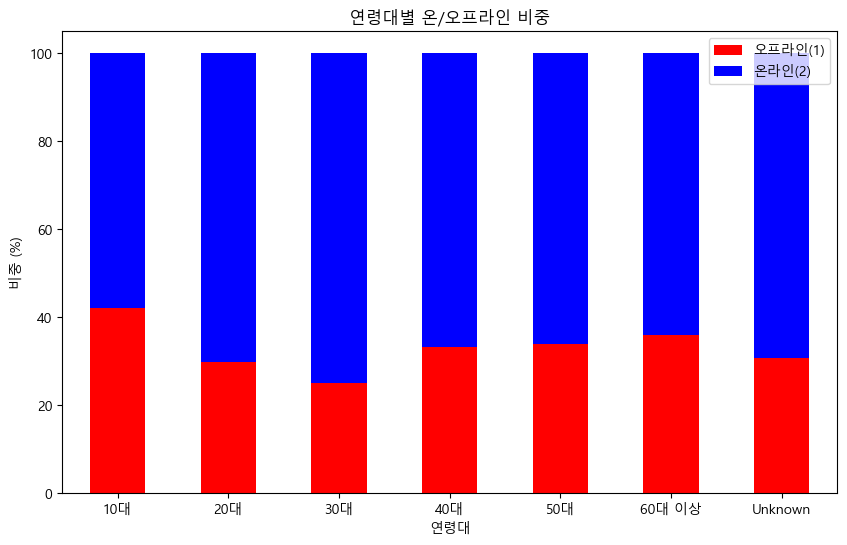

In [ ]:
import matplotlib.pyplot as plt


plt.rc('font', family='Malgun Gothic')
channel_perc.plot(kind='bar', stacked=True, color=['red', 'blue'], figsize=(10, 6))
plt.title('연령대별 온/오프라인 비중')
plt.xlabel('연령대')
plt.ylabel('비중 (%)')
plt.legend(title=None, labels=['오프라인(1)', '온라인(2)'])
plt.xticks(rotation=0)

plt.show()

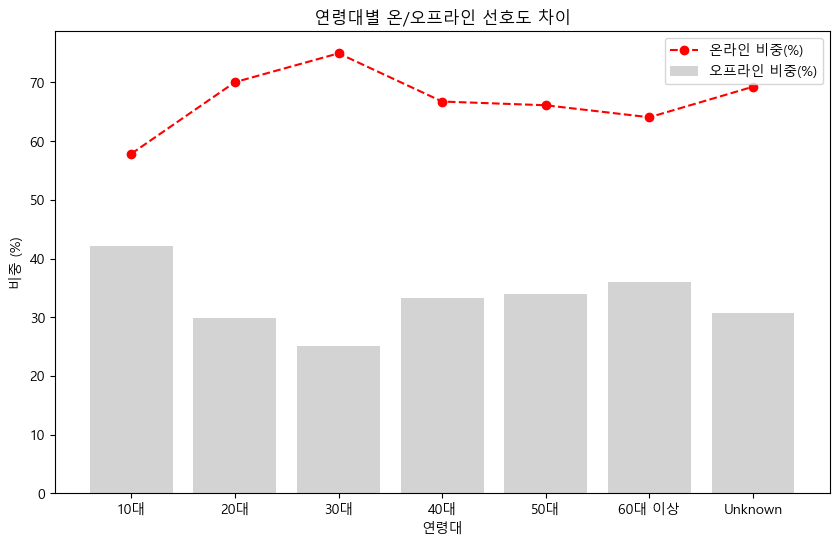

In [ ]:
import matplotlib.pyplot as plt


plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10, 6))
plt.bar(channel_perc.index, channel_perc['Offline(1)'], color='lightgray', label='오프라인 비중(%)')

# 4. 온라인 비중: 빨간색 점(o)과 선(--)으로 포인트 주기
plt.plot(channel_perc.index, channel_perc['Online(2)'], 'ro--', label='온라인 비중(%)')
plt.title('연령대별 온/오프라인 선호도 차이')
plt.xlabel('연령대')
plt.ylabel('비중 (%)')
plt.xticks(rotation=0)
plt.legend()

plt.show()

###### 20대(70.1%)보다도 30대가 온라인을 더 많이 쓴다는 건, 30대 타겟층이 시간 효율을 중시하는 '헤비 온라인 쇼퍼' 집단임을 시사합니다. 이들에게는 '빠른 배송'이나 '앱 전용 정기 구독' 서비스가 잘 먹힐 수 있겠다.
###### Unknown과 20대의 온라인 비중이 비슷한 이유 (69.3% vs 70.1%)
###### 이게 정말 대박 포인트입니다! 아까 "Unknown은 오프라인 비회원일 것"이라고 가설을 세웠지만, 수치는 정반대로 온라인이 압도적.
###### 가설 수정: "Unknown 고객들은 온라인에서 구매는 하지만, 회원 가입 시 개인정보(나이 등) 입력을 건너뛴 전략적 익명 고객일 가능성이 크다." 즉, 데이터는 없지만 구매 성향은 20대와 매우 유사한 젊은 층일 확률이 높다.
###### 10대의 오프라인 비중(42.1%)이 상대적으로 높은 이유
###### 전 연령대 중 10대가 오프라인 이용률이 가장 높다. 이건 10대들이 친구들과 직접 매장에 가서 입어보고 구매하는 ###### **'체험형 소비'**를 즐기거나, 온라인 결제 수단이 성인보다 제한적이기 때문일 수 있다.

In [ ]:
# 연령대별 매출 합계(sum)와 평균(mean) 계산
age_price_analysis = df_final.groupby('age_segment')['price'].agg(['sum', 'mean'])

# 정한 순서대로 정렬 
ordered_index = ['10대', '20대', '30대', '40대', '50대', '60대 이상', 'Unknown']
# age_price_analysis라는 바구니에서 ordered_index 순서대로 행을 골라옵니다.
age_price_analysis = age_price_analysis.loc[ordered_index]
age_price_analysis.columns = ['총 매출액', '평균 객단가']
print("### 연령대별 매출 성과 분석 ###")
age_price_analysis.round(4)

### 연령대별 매출 성과 분석 ###


,총 매출액,평균 객단가
age_segment,,
10대,322.2635,0.0236
20대,8926.8097,0.0271
30대,4600.6703,0.0280
40대,3454.6730,0.0275
50대,3944.0681,0.0292
60대 이상,1149.7797,0.0304
Unknown,6498.6379,0.0278


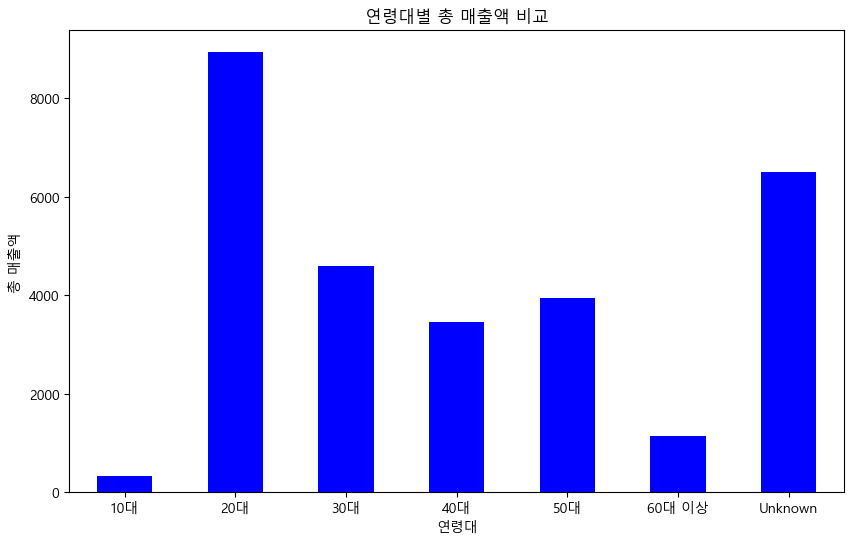

In [ ]:
import matplotlib.pyplot as plt


plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10, 6))
age_price_analysis['총 매출액'].plot(kind='bar', color='blue')
plt.title('연령대별 총 매출액 비교')
plt.xlabel('연령대')
plt.ylabel('총 매출액')
plt.xticks(rotation=0) 

plt.show()

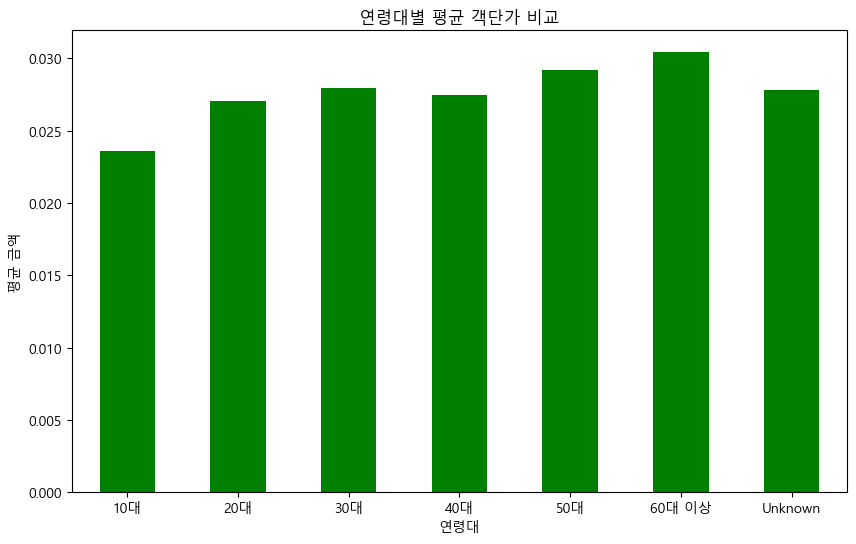

In [48]:
plt.figure(figsize=(10, 6))
age_price_analysis['평균 객단가'].plot(kind='bar', color='green')

plt.title('연령대별 평균 객단가 비교')
plt.xlabel('연령대')
plt.ylabel('평균 금액')
plt.xticks(rotation=0)

plt.show()

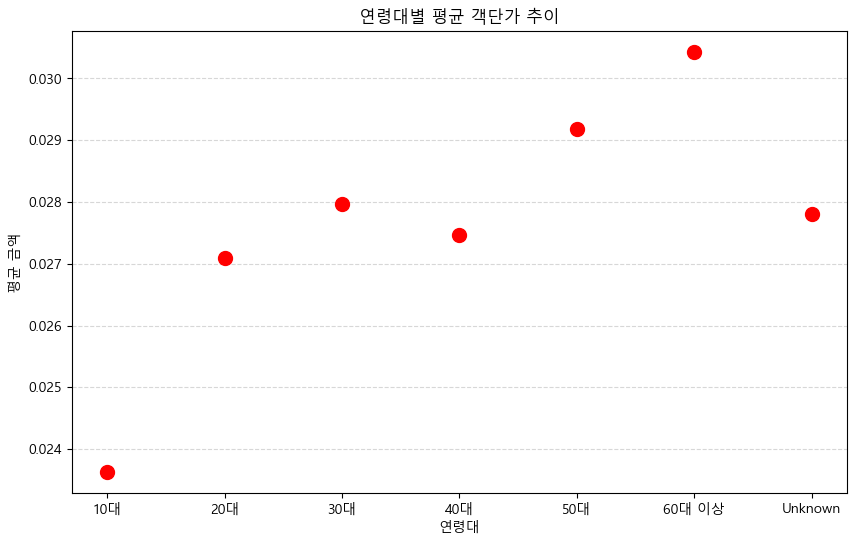

In [ ]:
import matplotlib.pyplot as plt


plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10, 6))
plt.plot(age_price_analysis.index, age_price_analysis['평균 객단가'], 'ro', markersize=10)
plt.title('연령대별 평균 객단가 추이')
plt.xlabel('연령대')
plt.ylabel('평균 금액')

# 5. 디테일 조정 (글자 똑바로 세우고 격자 추가)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5) # 점의 위치를 보기 편하게 연한 선 추가

plt.show()

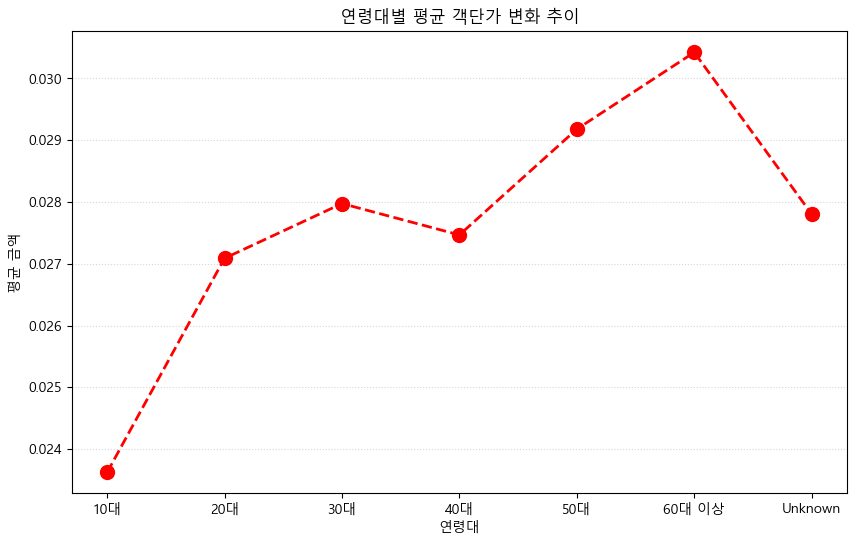

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(10, 6))
plt.plot(age_price_analysis.index, age_price_analysis['평균 객단가'], 'ro--', markersize=10, linewidth=2)
plt.title('연령대별 평균 객단가 변화 추이')
plt.xlabel('연령대')
plt.ylabel('평균 금액')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.show()

In [ ]:
# df_final(고객+거래)과 df_art(상품)를 article_id 기준으로 합치기
# 'left'를 쓰는 이유는 거래 기록(df_final)을 하나도 놓치지 않기 위해서
df_trend = pd.merge(df_final, df_art, on='article_id', how='left')

# 잘 합쳐졌는지, 상품 카테고리 컬럼이 생겼는지 확인
df_trend.columns
df_trend.head()

,t_dat,customer_id,article_id,price,sales_channel_id,channel,year_month,FN,Active,club_member_status,...,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,product_season,category_main,is_new,color_tone
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,0698328010,0.016932,2,온라인,2019-11,1.0,1.0,2.0,...,Divided,53,Divided Collection,1005,Jersey Fancy,Top in lightweight sweatshirt fabric with drop...,All-Season,Divided,Regular_Carryover,Dark_Tone
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,0760597002,0.033881,2,온라인,2019-05,0.0,0.0,2.0,...,Ladieswear,6,Womens Casual,1005,Jersey Fancy,"Short-sleeved blouse in stretch, textured jers...",All-Season,Ladieswear,Regular_Carryover,Light_Tone
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,0488561032,0.016932,2,온라인,2019-05,1.0,1.0,2.0,...,Menswear,21,Contemporary Casual,1025,Shorts,Knee-length shorts in soft washed cotton with ...,All-Season,Menswear,Regular_Carryover,Dark_Tone
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,0682771001,0.033881,2,온라인,2019-08,0.0,0.0,2.0,...,Ladieswear,65,Womens Big accessories,1019,Accessories,Shopper in grained imitation leather with two ...,All-Season,Ladieswear,Regular_Carryover,Dark_Tone
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,0742400033,0.003220,1,오프라인,2019-08,0.0,0.0,2.0,...,Menswear,26,Men Underwear,1021,Socks and Tights,"Socks in a soft, fine-knit cotton blend with r...",SS,Menswear,Regular_Carryover,Light_Tone


In [ ]:
# 1. 날짜 데이터 형식 확인 (이미 되어있겠지만 안전하게!)
df_trend['t_dat'] = pd.to_datetime(df_trend['t_dat'])

# 2. 거래가 가장 많았던 9월 28일 데이터만 뽑기
sep_28_data = df_trend[df_trend['t_dat'] == '2019-09-28'] 

# 3. 그날 어떤 상품군(Product Group)이 가장 많이 팔렸을까?
top_items = sep_28_data['product_group_name'].value_counts().head(5)

print("### 9월 28일 가장 많이 팔린 상품 TOP 5 ###")
print(top_items)

### 9월 28일 가장 많이 팔린 상품 TOP 5 ###
product_group_name
Garment Upper body    6722
Garment Lower body    2768
Garment Full body      947
Underwear              922
Accessories            597
Name: count, dtype: int64


In [ ]:
# 1. 'year_month' 컬럼을 활용해 월별 매출액 합계 계산
monthly_sales = df_trend.groupby('year_month')['price'].sum()
print(monthly_sales.round(2))

year_month
2019-01    2129.93
2019-02    1989.22
2019-03    2374.91
2019-04    2703.44
2019-05    2748.20
2019-06    3088.78
2019-07    2552.04
2019-08    1943.42
2019-09    2559.23
2019-10    2358.49
2019-11    2463.77
2019-12    1985.49
Freq: M, Name: price, dtype: float64


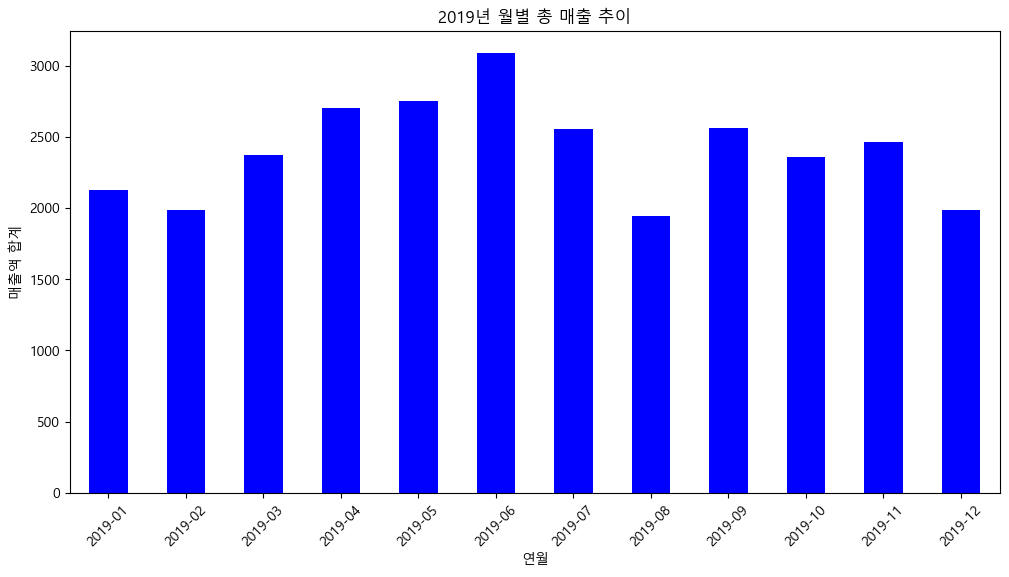

In [ ]:
# 3. 시각화 
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='blue')

plt.title('2019년 월별 총 매출 추이')
plt.xlabel('연월')
plt.ylabel('매출액 합계')
plt.xticks(rotation=45)

plt.show()

In [ ]:

june_data = df_trend[df_trend['year_month'] == '2019-06']


print(f"6월 전체 거래 건수: {len(june_data)}건")

# 6월 베스트셀러 TOP 5
june_top5 = june_data['product_group_name'].value_counts().head(5)
print(june_top5)



6월 전체 거래 건수: 121068건
product_group_name
Garment Upper body    38612
Garment Lower body    27215
Garment Full body     18563
Swimwear              18515
Underwear              8092
Name: count, dtype: int64


In [ ]:

print("### [판매량 1위] 9월 28일 베스트셀러 TOP 5 ###")
print(sep_28_data['product_group_name'].value_counts().head(5))

### [판매량 1위] 9월 28일 베스트셀러 TOP 5 ###
product_group_name
Garment Upper body    6722
Garment Lower body    2768
Garment Full body      947
Underwear              922
Accessories            597
Name: count, dtype: int64


### 6월 수영복 구매 연령대 TOP 5 ###
age_segment
20대        7446
Unknown    4051
30대        2294
50대        2190
40대        1842
10대         425
60대 이상      267
Name: count, dtype: int64


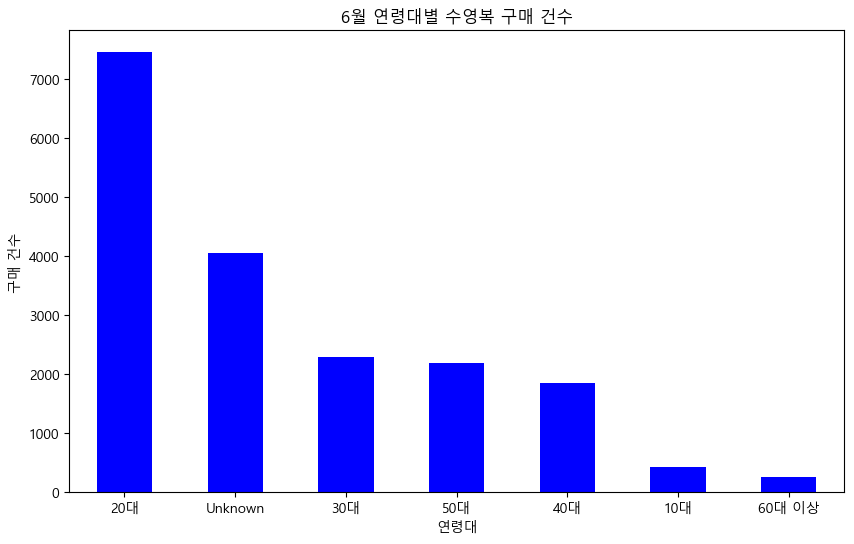

In [ ]:

june_swim = june_data[june_data['product_group_name'] == 'Swimwear']
swim_age_trend = june_swim['age_segment'].value_counts()

print("### 6월 수영복 구매 연령대 TOP 5 ###")
print(swim_age_trend)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
swim_age_trend.plot(kind='bar', color='blue') # 온라인 강세 품목이니 블루!

plt.title('6월 연령대별 수영복 구매 건수')
plt.xlabel('연령대')
plt.ylabel('구매 건수')
plt.xticks(rotation=0)

plt.show()

In [ ]:
print("### 현재 df_art의 컬럼 목록 ###")
print(df_art.columns)


### 현재 df_art의 컬럼 목록 ###
Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc',
       'product_season', 'category_main', 'is_new', 'color_tone'],
      dtype='str')


In [59]:
print(df_trend.columns)

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id',
       'channel', 'year_month', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'age_segment', 'product_code',
       'prod_name', 'product_type_no', 'product_type_name',
       'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc',
       'product_season', 'category_main', 'is_new', 'color_tone'],
      dtype='str')


In [ ]:

june_trend = df_trend[df_trend['year_month'] == '2019-06']
season_summary = june_trend['product_season'].value_counts()

print("### 6월의 시즌 아이템 판매 비중 (최종 업데이트) ###")
print(season_summary)

### 6월의 시즌 아이템 판매 비중 (최종 업데이트) ###
product_season
All-Season    71602
SS            45263
FW             4203
Name: count, dtype: int64


In [ ]:
print("### 9월 28일 시즌 분포 (최종 업데이트 로직 반영) ###")
print("-" * 30)
print("[시즌 분포]")
print(sep_28_data['product_season'].value_counts())

### 9월 28일 시즌 분포 (최종 업데이트 로직 반영) ###
------------------------------
[시즌 분포]
product_season
All-Season    9497
FW            1767
SS            1473
Name: count, dtype: int64


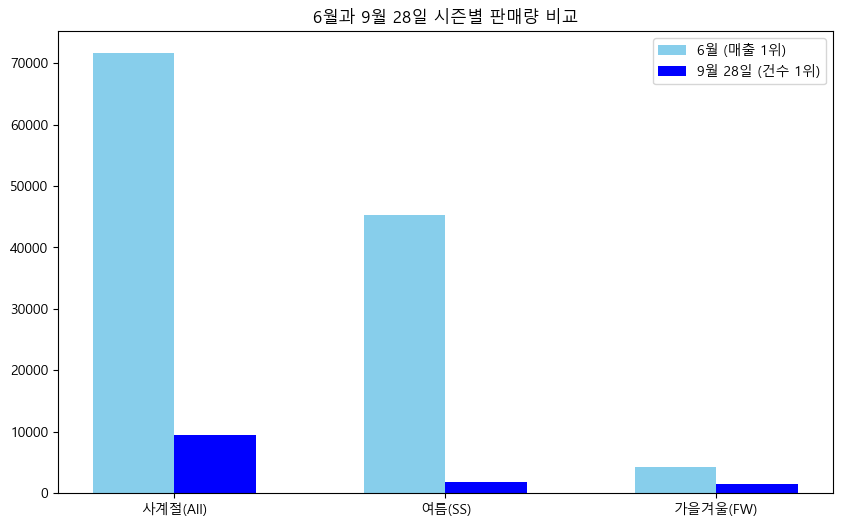

In [ ]:
import matplotlib.pyplot as plt


plt.rc('font', family='Malgun Gothic')
june_counts = [71602, 45263, 4203] 
sep_counts = [9497, 1767, 1473]
labels = ['사계절(All)', '여름(SS)', '가을겨울(FW)']
plt.figure(figsize=(10, 6))
plt.bar([0, 1, 2], june_counts, width=0.3, label='6월 (매출 1위)', color='skyblue')
plt.bar([0.3, 1.3, 2.3], sep_counts, width=0.3, label='9월 28일 (건수 1위)', color='blue')
plt.title('6월과 9월 28일 시즌별 판매량 비교')
plt.xticks([0.15, 1.15, 2.15], labels) 
plt.legend()
plt.show()

In [ ]:

online_data = df_trend[df_trend['sales_channel_id'] == 2]
target_groups = ['30대', 'Unknown']

print("### 온라인 핵심 고객(30대 & Unknown)의 쇼핑 전략 ###")
for group in target_groups:
    group_data = online_data[online_data['age_segment'] == group]
    print(f"\n[{group} 그룹의 제품 전략 분포]")
    print(group_data['product_season'].value_counts(normalize=True).round(2) * 100)

### 온라인 핵심 고객(30대 & Unknown)의 쇼핑 전략 ###

[30대 그룹의 제품 전략 분포]
product_season
All-Season    65.0
SS            27.0
FW             8.0
Name: proportion, dtype: float64

[Unknown 그룹의 제품 전략 분포]
product_season
All-Season    65.0
SS            27.0
FW             8.0
Name: proportion, dtype: float64


In [64]:
# 1. 30대와 Unknown 그룹의 실제 데이터(행) 개수 비교
count_30s = len(online_data[online_data['age_segment'] == '30대'])
count_unknown = len(online_data[online_data['age_segment'] == 'Unknown'])

print(f"--- [데이터 개수 검증] ---")
print(f"30대 그룹 데이터 개수: {count_30s}행")
print(f"Unknown 그룹 데이터 개수: {count_unknown}행")

# 2. 만약 개수가 다른데 비중(%)이 똑같다면?
if count_30s != count_unknown:
    print("\n✅ 검증 완료: 데이터 개수가 다르므로, 두 그룹의 소비 성향이 우연히 '쌍둥이'처럼 일치하는 것입니다!")
else:
    print("\n⚠️ 점검 필요: 데이터 개수까지 소수점 하나 안 틀리고 똑같다면, 위쪽 필터링 로직을 다시 봐야 합니다.")

--- [데이터 개수 검증] ---
30대 그룹 데이터 개수: 123284행
Unknown 그룹 데이터 개수: 161912행

✅ 검증 완료: 데이터 개수가 다르므로, 두 그룹의 소비 성향이 우연히 '쌍둥이'처럼 일치하는 것입니다!


In [ ]:

offline_data = df_trend[df_trend['sales_channel_id'] == 1]

print("### [3번 결과] 오프라인 인기 상품군 TOP 5 ###")
print(offline_data['product_group_name'].value_counts().head(5))
print("\n### [참고] 오프라인 제품 전략 분포 ###")
print(offline_data['product_season'].value_counts(normalize=True).round(2) * 100)

### [3번 결과] 오프라인 인기 상품군 TOP 5 ###
product_group_name
Garment Upper body    139262
Garment Lower body     62665
Underwear              29101
Accessories            26672
Garment Full body      24826
Name: count, dtype: int64

### [참고] 오프라인 제품 전략 분포 ###
product_season
All-Season    71.0
SS            18.0
FW            10.0
Name: proportion, dtype: float64


In [ ]:

offline_unknown = df_trend[(df_trend['sales_channel_id'] == 1) & 
                        (df_trend['age_segment'] == 'Unknown')]

print("### [추가 분석] Unknown 그룹의 오프라인 쇼핑 전략 ###")
if len(offline_unknown) > 0:
    print(offline_unknown['product_season'].value_counts(normalize=True).round(2) * 100)
    print("\n[오프라인 Unknown 인기 상품군 TOP 5]")
    print(offline_unknown['product_group_name'].value_counts().head(5))
else:
    print("Unknown 그룹의 오프라인 데이터를 찾을 수 없습니다.")

### [추가 분석] Unknown 그룹의 오프라인 쇼핑 전략 ###
product_season
All-Season    71.0
SS            18.0
FW            10.0
Name: proportion, dtype: float64

[오프라인 Unknown 인기 상품군 TOP 5]
product_group_name
Garment Upper body    31494
Garment Lower body    14097
Underwear              6449
Accessories            5970
Garment Full body      5649
Name: count, dtype: int64


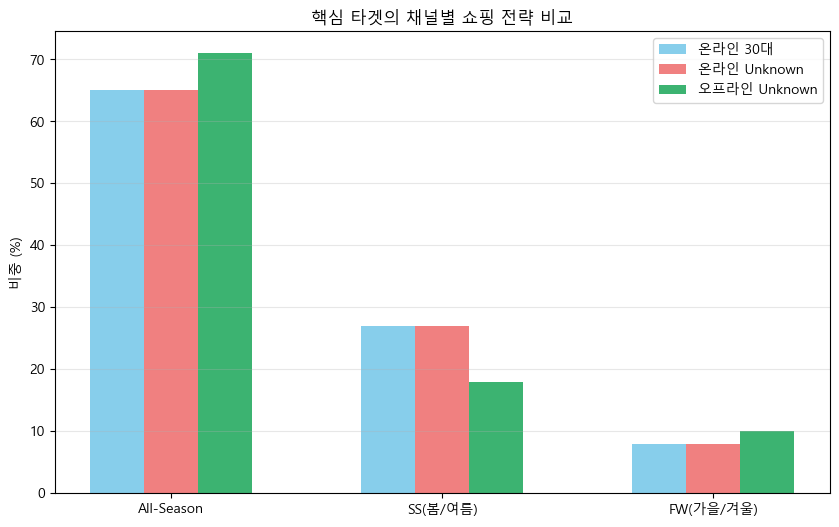

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
data_online_30s = [65, 27, 8]    # 온라인 30대 결과
data_online_unk = [65, 27, 8]    # 온라인 Unknown 결과
data_offline_unk = [71, 18, 10]   # 오프라인 Unknown 결과

plt.figure(figsize=(10, 6))
plt.bar([0, 1, 2], data_online_30s, width=0.2, label='온라인 30대', color='skyblue')
plt.bar([0.2, 1.2, 2.2], data_online_unk, width=0.2, label='온라인 Unknown', color='lightcoral')
plt.bar([0.4, 1.4, 2.4], data_offline_unk, width=0.2, label='오프라인 Unknown', color='mediumseagreen')
plt.title('핵심 타겟의 채널별 쇼핑 전략 비교')
plt.ylabel('비중 (%)')
plt.xticks([0.2, 1.2, 2.2], ['All-Season', 'SS(봄/여름)', 'FW(가을/겨울)']) 
plt.legend() 
plt.grid(axis='y', alpha=0.3) #

plt.show()

###### 온라인의 전략적 소비 (하늘색 & 분홍색):

###### 30대와 Unknown 그룹 모두 온라인에서는 **SS(여름) 아이템 비중이 27%**로 오프라인보다 높게 나타납니다. 이는 온라인 쇼핑객들이 계절 변화에 더 민감하게 반응하여 필요한 시즌 아이템을 전략적으로 구매하고 있음을 보여줍니다.

###### 오프라인의 '일반 패션' 집중 (초록색):

###### Unknown 오프라인 그룹은 **'All-Season' 비중이 약 71%**로 온라인보다 훨씬 높습니다. 오프라인 매장에서는 특정 시즌 아이템보다는 유행을 타지 않는 기본 상품군이나 일상복 위주의 소비가 더 활발하다는 것을 알 수 있습니다.


In [ ]:

online_data = df_trend[df_trend['sales_channel_id'] == 2]
target_groups = ['20대', 'Unknown']

print("### 온라인 핵심 고객(20대 & Unknown)의 쇼핑 전략 ###")
for group in target_groups:
    group_data = online_data[online_data['age_segment'] == group]
    print(f"\n[{group} 그룹의 제품 전략 분포]")
    print(group_data['product_season'].value_counts(normalize=True).round(2) * 100)

### 온라인 핵심 고객(20대 & Unknown)의 쇼핑 전략 ###

[20대 그룹의 제품 전략 분포]
product_season
All-Season    64.0
SS            29.0
FW             7.0
Name: proportion, dtype: float64

[Unknown 그룹의 제품 전략 분포]
product_season
All-Season    65.0
SS            27.0
FW             8.0
Name: proportion, dtype: float64


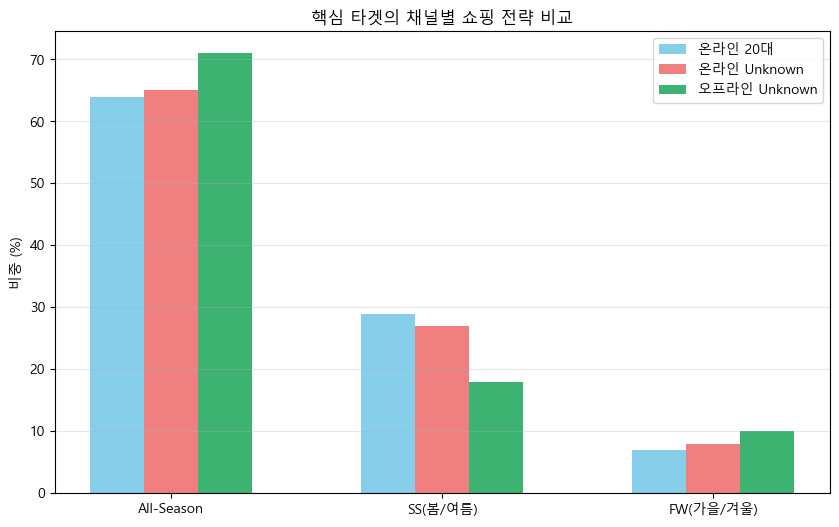

In [ ]:
import matplotlib.pyplot as plt


plt.rc('font', family='Malgun Gothic')


data_online_20s = [64, 29, 7]    # 온라인 20대 결과
data_online_unk = [65, 27, 8]    # 온라인 Unknown 결과
data_offline_unk = [71, 18, 10]   # 오프라인 Unknown 결과
plt.figure(figsize=(10, 6))
plt.bar([0, 1, 2], data_online_20s, width=0.2, label='온라인 20대', color='skyblue')
plt.bar([0.2, 1.2, 2.2], data_online_unk, width=0.2, label='온라인 Unknown', color='lightcoral')
plt.bar([0.4, 1.4, 2.4], data_offline_unk, width=0.2, label='오프라인 Unknown', color='mediumseagreen')
plt.title('핵심 타겟의 채널별 쇼핑 전략 비교')
plt.ylabel('비중 (%)')
plt.xticks([0.2, 1.2, 2.2], ['All-Season', 'SS(봄/여름)', 'FW(가을/겨울)']) 
plt.legend()
plt.grid(axis='y', alpha=0.3) 

plt.show()

In [ ]:

offline_20s = df_trend[(df_trend['sales_channel_id'] == 1) & (df_trend['age_segment'] == '20대')]
offline_unk = df_trend[(df_trend['sales_channel_id'] == 1) & (df_trend['age_segment'] == 'Unknown')]

print("### [추가 분석] 20대 vs Unknown의 오프라인 쇼핑 전략 ###")
print("\n[20대 그룹의 오프라인 제품 전략 분포]")
print(offline_20s['product_season'].value_counts(normalize=True).round(2) * 100)
print("\n[Unknown 그룹의 오프라인 제품 전략 분포]")
print(offline_unk['product_season'].value_counts(normalize=True).round(2) * 100)

### [추가 분석] 20대 vs Unknown의 오프라인 쇼핑 전략 ###

[20대 그룹의 오프라인 제품 전략 분포]
product_season
All-Season    70.0
SS            20.0
FW            10.0
Name: proportion, dtype: float64

[Unknown 그룹의 오프라인 제품 전략 분포]
product_season
All-Season    71.0
SS            18.0
FW            10.0
Name: proportion, dtype: float64


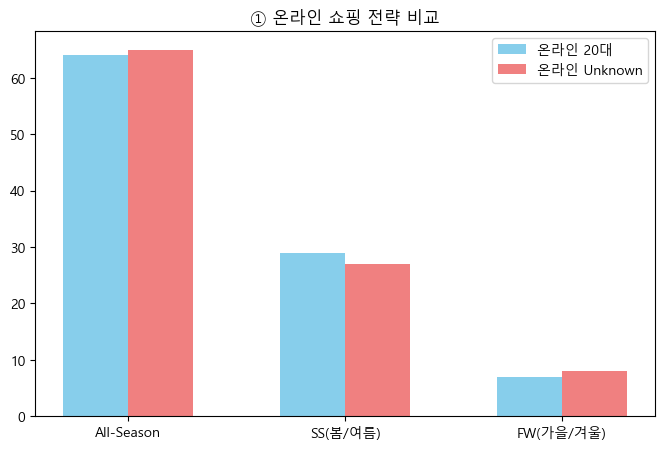

In [ ]:
import matplotlib.pyplot as plt


plt.rc('font', family='Malgun Gothic')
online_20s = [64, 29, 7] 
online_unk = [65, 27, 8]
labels = ['All-Season', 'SS(봄/여름)', 'FW(가을/겨울)']

plt.figure(figsize=(8, 5))
plt.bar([0, 1, 2], online_20s, width=0.3, label='온라인 20대', color='skyblue')
plt.bar([0.3, 1.3, 2.3], online_unk, width=0.3, label='온라인 Unknown', color='lightcoral')

plt.title('① 온라인 쇼핑 전략 비교')
plt.xticks([0.15, 1.15, 2.15], labels)
plt.legend()
plt.show()

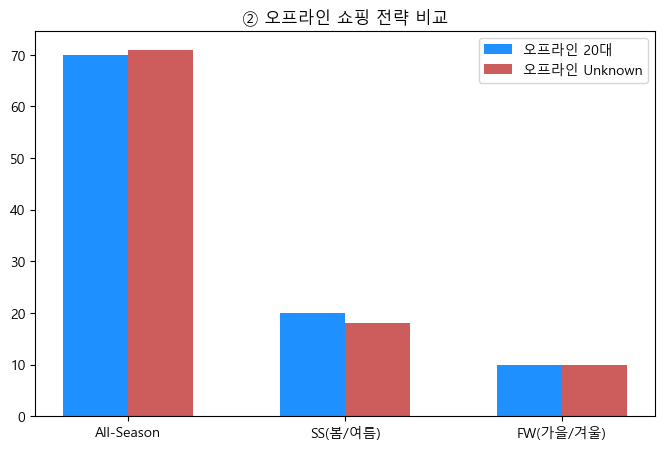

In [ ]:

offline_20s = [70, 20, 10] 
offline_unk = [71, 18, 10]

plt.figure(figsize=(8, 5))
plt.bar([0, 1, 2], offline_20s, width=0.3, label='오프라인 20대', color='dodgerblue')
plt.bar([0.3, 1.3, 2.3], offline_unk, width=0.3, label='오프라인 Unknown', color='indianred')

plt.title('② 오프라인 쇼핑 전략 비교')
plt.xticks([0.15, 1.15, 2.15], labels)
plt.legend()
plt.show()

## 구매액이 가장 큰 20대(1등)와 Unknown(2등)이고, 앞에서 봤던 표를 봤을 때 둘 다 온라인 비중이 높으니까 온라인 프로모션 이벤트와 더불어서 ALL-Season 상품 할인을 하면 좋겠다

###### 1. 왜 '온라인'인가?

###### 데이터 확인 결과, 구매액이 가장 큰 20대와 Unknown 그룹 모두 타 연령대 대비 온라인(Channel 2) 이용 비중이 압도적으로 높습니다. 특히 20대는 오프라인보다 온라인 구매 비중이 훨씬 크기 때문에 온라인 중심의 프로모션은 필수적입니다.

###### 2. 왜 '올시즌(All-Season)' 상품인가?

###### 수치를 보면, 두 그룹 모두 **All-Season 상품 구매 비중이 64~65%**로 전체 매출의 절반 이상을 차지하고 있습니다. 즉, 가장 많이 팔리는 효자 상품군에 혜택을 집중하여 구매 전환율을 극대화하는 전략입니다.

###### 3. 최종 전략: "온라인 올시즌 페스타" 🏆

###### 핵심 타겟: 20대 및 Unknown 온라인 쇼퍼

###### 실행 방안: 온라인 전용 올시즌 베스트셀러 할인 쿠폰 발급 + 20대 선호 브랜드 기획전

###### 팬데믹 이전의 순수 소비 패턴:

###### 2020년 코로나19가 터지기 직전인 2019년 데이터는, 외부 요인에 의한 강제적인 변화가 아닌 고객들의 순수한 쇼핑 성향을 보여주는 아주 귀한 자료입니다.

###### 이때 이미 20대와 Unknown 그룹이 온라인 비중[cite: image_8fe110.png]을 높게 가져갔다는 것은, 이들이 **이커머스 시장의 '얼리 어댑터'**였음을 증명합니다.

###### H&M의 글로벌 전략 확인:

###### H&M은 2019년 당시 전 세계적으로 온라인 매출 비중을 높이기 위해 공격적인 투자를 하던 시기였습니다.

###### "온라인에서의 All-Season 강세"수치는, 당시 H&M이 지향하던 '언제 어디서나 접근 가능한 패션' 전략이 데이터로 입증된 결과라고 볼 수 있습니다.

###### 정교한 시즌 로직의 가치:

###### 2019년은 패션 트렌드가 매우 빨랐던 해입니다. shorts, knit, coat 등 세밀한 키워드로 시즌을 다시 분류하신 덕분에, 자칫 뭉뚱그려질 수 있었던 2019년의 계절별 소비 흐름을 아주 선명하게 살림

##### 본 분석은 팬데믹 이전인 2019년 H&M 데이터를 바탕으로 하며, 정교화된 시즌 분류 로직을 통해 온라인 핵심 타겟(20대 & Unknown)의 소비 패턴을 분석했습니다. 이를 통해 이커머스 매출 극대화를 위한 'All-Season 중심의 온라인 프로모션' 전략을 도출했습니다."

In [73]:
# 1. 2019년 6월 데이터를 '다른 이름'으로 명확히 정의
june_final_analysis = df_trend[df_trend['year_month'] == '2019-06']

# 2. 전 연령대 타겟 다시 정의
all_age_groups = ['10대', '20대', '30대', '40대', '50대', '60대 이상', 'Unknown']

print("### [2019년 6월] 전 연령대별 카테고리(Index Group) 분포 ###")
print("-" * 50)

for age in all_age_groups:
    # 새로운 데이터프레임 이름(june_final_analysis) 사용
    current_age_data = june_final_analysis[june_final_analysis['age_segment'] == age]
    
    if not current_age_data.empty:
        # 비중(%) 계산
        distribution = current_age_data['index_group_name'].value_counts(normalize=True).round(4) * 100
        print(f"\n[{age} 그룹의 선호 분포]")
        print(distribution)
    else:
        print(f"\n[{age}] 데이터가 없습니다.")

### [2019년 6월] 전 연령대별 카테고리(Index Group) 분포 ###
--------------------------------------------------

[10대 그룹의 선호 분포]
index_group_name
Ladieswear       61.35
Divided          32.82
Menswear          2.76
Sport             1.76
Baby/Children     1.29
Name: proportion, dtype: float64

[20대 그룹의 선호 분포]
index_group_name
Ladieswear       67.99
Divided          23.81
Menswear          4.47
Sport             2.81
Baby/Children     0.93
Name: proportion, dtype: float64

[30대 그룹의 선호 분포]
index_group_name
Ladieswear       70.53
Divided          18.15
Menswear          4.74
Sport             3.39
Baby/Children     3.19
Name: proportion, dtype: float64

[40대 그룹의 선호 분포]
index_group_name
Ladieswear       64.73
Divided          20.87
Menswear          6.12
Baby/Children     5.64
Sport             2.64
Name: proportion, dtype: float64

[50대 그룹의 선호 분포]
index_group_name
Ladieswear       68.37
Divided          19.22
Menswear          7.91
Sport             2.35
Baby/Children     2.15
Name: proportion, dtype: 

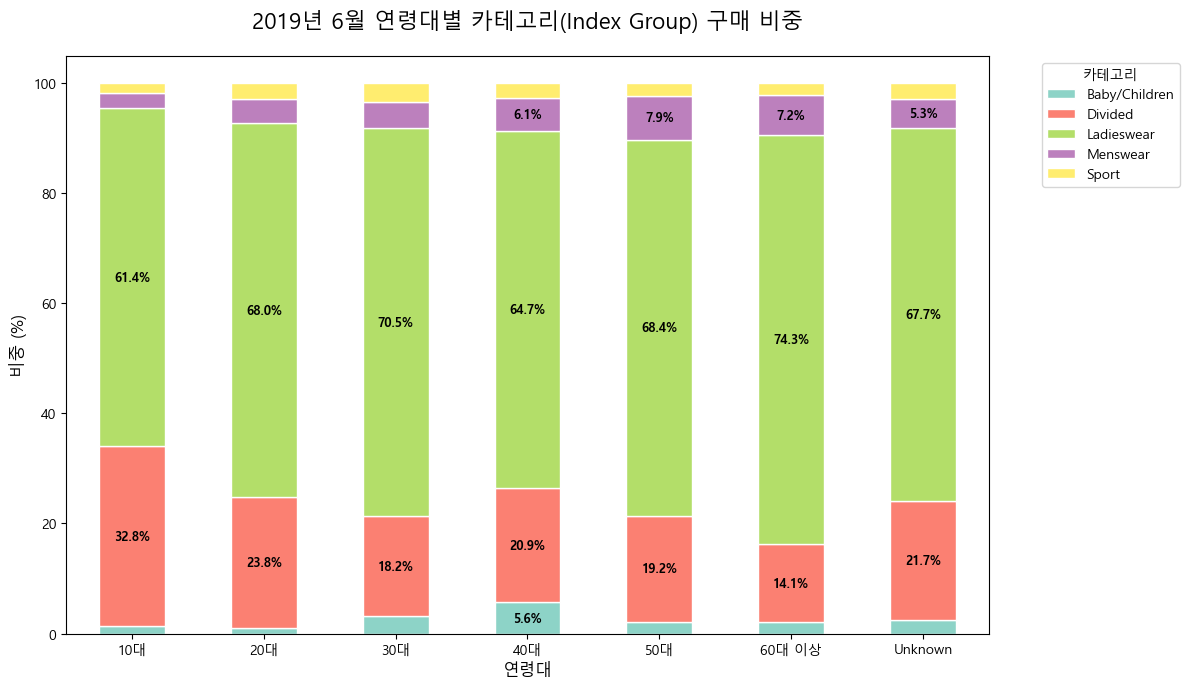

In [74]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. 시각화를 위한 데이터 준비 (비율 데이터프레임 만들기)
plot_list = []
for age in all_age_groups:
    group_df = june_final_analysis[june_final_analysis['age_segment'] == age]
    if not group_df.empty:
        dist = group_df['index_group_name'].value_counts(normalize=True) * 100
        for cat, val in dist.items():
            plot_list.append({'연령대': age, '카테고리': cat, '비중': val})

df_plot = pd.DataFrame(plot_list)
pivot_df = df_plot.pivot(index='연령대', columns='카테고리', values='비중').reindex(all_age_groups).fillna(0)

# 2. 그래프 그리기
plt.rc('font', family='Malgun Gothic') # 한글 깨짐 방지
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set3', edgecolor='white')

# 3. 그래프 꾸미기
plt.title('2019년 6월 연령대별 카테고리(Index Group) 구매 비중', fontsize=16, pad=20)
plt.ylabel('비중 (%)', fontsize=12)
plt.xlabel('연령대', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='카테고리', bbox_to_anchor=(1.05, 1), loc='upper left')

# 막대 위에 숫자 표시 (비중이 5% 이상인 것만)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 5:
        ax.text(p.get_x() + width/2, p.get_y() + height/2, f'{height:.1f}%', 
                ha='center', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

###### 브랜드의 핵심 엔진: 10대부터 60대 이상까지 Ladieswear가 1등이라는 건, 연령과 상관없이 **"H&M = 여성복"**이라는 인식이 고객들에게 강력하게 박혀 있다는 뜻입니다.

###### Unknown 그룹의 정체: Unknown 그룹의 Ladieswear 비중이 다른 연령대(특히 30대)와 비슷하게 높다면, "연령 미상 고객들도 결국 여성복을 주력으로 소비하는 3040 여성층일 가능성이 매우 높다"는 논리적인 추론이 가능해집니다. 🫡✨

###### 마케팅 집중 전략: 전 연령대에서 여성복이 강세라면, 서기님이 아까 세우신 **"온라인 올시즌 프로모션"**은 당연히 여성복 카테고리에 예산을 집중 투여해야 '압승'할 수 있다는 결론이 나옵니다. 🏆

###### 10대~20대: 여성복 다음으로 Divided(영캐주얼) 비중이 꽤 높게 나올 거예요. 풋풋한 감성의 젊은 층 타겟 상품이죠.

###### 30대 이상: 연령대가 올라갈수록 Baby/Children(아동복) 비중이 슬슬 올라오는지 확인해 보세요. 30대 이상의 고객들은 본인 옷뿐만 아니라 아이 옷도 함께 쇼핑하는 패턴을 보이기 때문입니다. 👶